In [1]:
import warnings
warnings.filterwarnings("ignore")
import csv
import pandas as pd
import numpy as np
import math
import scipy
from numpy.linalg import lstsq
from scipy.optimize import curve_fit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
import datetime as dt
import matplotlib.dates as mdates
%matplotlib inline

In [2]:
appVolDat = pd.read_csv('../data/filingVolumes.csv')
appVolDat = appVolDat.iloc[1272:1391] #outlier
appVolDat = appVolDat.reset_index(drop=True)
maximum = max(appVolDat.volume)
appVolDat['vol'] = appVolDat.volume/maximum

trend = pd.read_csv('../data/trend_costOfPatent.csv').trends.iloc[24:144].reset_index(drop=True)/100
appVolDat['trend1'] = trend#(trend1 - np.mean(trend1)) / np.std(trend1)

trend = pd.read_csv('../data/trend_utilityVDesign.csv').trends.iloc[24:144].reset_index(drop=True)/100
appVolDat['trend2'] = trend#(trend1 - np.mean(trend1)) / np.std(trend1)

trend = pd.read_csv('../data/trend_uspto.csv').trends.iloc[24:144].reset_index(drop=True)/100
appVolDat['trend3'] = trend#(trend1 - np.mean(trend1)) / np.std(trend1)

trend = pd.read_csv('../data/trend_patentApplicationProcess.csv').trends.iloc[24:144].reset_index(drop=True)/100
appVolDat['trend4'] = trend#(trend1 - np.mean(trend1)) / np.std(trend1)

trend = pd.read_csv('../data/trend_patentApplicationSearch.csv').trends.iloc[24:144].reset_index(drop=True)/100
appVolDat['trend5'] = trend#(trend1 - np.mean(trend1)) / np.std(trend1)

trend = pd.read_csv('../data/trend_efs-web.csv').trends.iloc[24:144].reset_index(drop=True)/100
appVolDat['trend6'] = trend#(trend1 - np.mean(trend1)) / np.std(trend1)

trend = pd.read_csv('../data/trend_patentsView.csv').trends.iloc[24:144].reset_index(drop=True)/100
appVolDat['trend7'] = trend#(trend1 - np.mean(trend1)) / np.std(trend1)

trend = pd.read_csv('../data/trend_fileForPatent.csv').trends.iloc[24:144].reset_index(drop=True)/100
appVolDat['trend8'] = trend#(trend1 - np.mean(trend1)) / np.std(trend1)

trend = pd.read_csv('../data/trend_patentFilingFees.csv').trends.iloc[24:144].reset_index(drop=True)/100
appVolDat['trend9'] = trend#(trend1 - np.mean(trend1)) / np.std(trend1)

for i in range(1,13):
    appVolDat['volShift'+str(i)] = appVolDat.vol.shift(i)
appVolDat = appVolDat.iloc[12:]

In [3]:
X_train = appVolDat.iloc[:84]
X_test = appVolDat.iloc[84:107] #last data point is outlier
#X_train, X_test = train_test_split(appVolDat, test_size=0.25, random_state=0)
print("Num rows in X_train:", len(X_train))
print("Num rows in X_test:", len(X_test))
X_train

Num rows in X_train: 84
Num rows in X_test: 23


,month,volume,vol,trend1,trend2,trend3,trend4,trend5,trend6,trend7,...,volShift3,volShift4,volShift5,volShift6,volShift7,volShift8,volShift9,volShift10,volShift11,volShift12
12,1/1/2007,37114,0.446721,0.17,0.00,0.77,0.24,0.54,0.52,0.00,...,0.473899,0.472960,0.477799,0.415775,0.516339,0.479725,0.419903,0.524536,0.399646,0.401957
13,2/1/2007,35188,0.423538,0.55,0.00,0.75,0.13,0.11,0.00,0.24,...,0.458143,0.473899,0.472960,0.477799,0.415775,0.516339,0.479725,0.419903,0.524536,0.399646
14,3/1/2007,44173,0.531686,0.33,0.00,0.70,0.11,0.51,0.99,0.43,...,0.532288,0.458143,0.473899,0.472960,0.477799,0.415775,0.516339,0.479725,0.419903,0.524536
15,4/1/2007,37711,0.453906,0.33,0.00,0.79,0.11,0.21,1.00,0.21,...,0.446721,0.532288,0.458143,0.473899,0.472960,0.477799,0.415775,0.516339,0.479725,0.419903
16,5/1/2007,40160,0.483384,0.30,0.00,0.76,0.00,0.09,0.00,0.39,...,0.423538,0.446721,0.532288,0.458143,0.473899,0.472960,0.477799,0.415775,0.516339,0.479725
17,6/1/2007,41242,0.496407,0.41,0.00,0.92,0.11,0.40,0.00,0.42,...,0.531686,0.423538,0.446721,0.532288,0.458143,0.473899,0.472960,0.477799,0.415775,0.516339
18,7/1/2007,36923,0.444422,0.23,0.00,0.77,0.00,0.28,0.00,0.00,...,0.453906,0.531686,0.423538,0.446721,0.532288,0.458143,0.473899,0.472960,0.477799,0.415775
19,8/1/2007,40940,0.492772,0.14,0.00,0.85,0.20,0.18,0.43,0.19,...,0.483384,0.453906,0.531686,0.423538,0.446721,0.532288,0.458143,0.473899,0.472960,0.477799
20,9/1/2007,38331,0.461369,0.15,0.00,0.78,0.30,0.36,0.43,0.00,...,0.496407,0.483384,0.453906,0.531686,0.423538,0.446721,0.532288,0.458143,0.473899,0.472960
21,10/1/2007,48968,0.589401,0.19,0.00,0.84,0.18,0.32,0.00,0.00,...,0.444422,0.496407,0.483384,0.453906,0.531686,0.423538,0.446721,0.532288,0.458143,0.473899


In [4]:
X_test

,month,volume,vol,trend1,trend2,trend3,trend4,trend5,trend6,trend7,...,volShift3,volShift4,volShift5,volShift6,volShift7,volShift8,volShift9,volShift10,volShift11,volShift12
96,1/1/2014,40503,0.487512,0.39,0.32,0.68,0.09,0.54,0.29,0.15,...,0.541267,0.534141,0.514257,0.493603,0.514269,0.496215,0.429605,1.000000,0.500126,0.483889
97,2/1/2014,41112,0.494842,0.71,0.00,0.68,0.05,0.49,0.43,0.09,...,0.490738,0.541267,0.534141,0.514257,0.493603,0.514269,0.496215,0.429605,1.000000,0.500126
98,3/1/2014,62356,0.750545,0.55,0.42,0.69,0.02,0.53,0.10,0.04,...,0.596261,0.490738,0.541267,0.534141,0.514257,0.493603,0.514269,0.496215,0.429605,1.000000
99,4/1/2014,44000,0.529604,0.62,0.22,0.69,0.14,0.35,0.00,0.13,...,0.487512,0.596261,0.490738,0.541267,0.534141,0.514257,0.493603,0.514269,0.496215,0.429605
100,5/1/2014,44872,0.540099,0.65,0.68,0.65,0.02,0.48,0.11,0.09,...,0.494842,0.487512,0.596261,0.490738,0.541267,0.534141,0.514257,0.493603,0.514269,0.496215
101,6/1/2014,47230,0.568481,0.60,0.00,0.76,0.14,0.42,0.24,0.18,...,0.750545,0.494842,0.487512,0.596261,0.490738,0.541267,0.534141,0.514257,0.493603,0.514269
102,7/1/2014,43508,0.523682,0.47,0.25,0.69,0.11,0.41,0.12,0.12,...,0.529604,0.750545,0.494842,0.487512,0.596261,0.490738,0.541267,0.534141,0.514257,0.493603
103,8/1/2014,41927,0.504652,0.33,0.75,0.67,0.18,0.41,0.11,0.05,...,0.540099,0.529604,0.750545,0.494842,0.487512,0.596261,0.490738,0.541267,0.534141,0.514257
104,9/1/2014,47693,0.574054,0.53,0.12,0.69,0.05,0.27,0.44,0.19,...,0.568481,0.540099,0.529604,0.750545,0.494842,0.487512,0.596261,0.490738,0.541267,0.534141
105,10/1/2014,45378,0.546190,0.64,0.23,0.69,0.07,0.33,0.21,0.20,...,0.523682,0.568481,0.540099,0.529604,0.750545,0.494842,0.487512,0.596261,0.490738,0.541267


In [5]:
def func(X,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z):
    parameters = [a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z]
    variables = ['volShift1', 'volShift2', 'volShift3', 'volShift4', 'volShift5', 'volShift6', 'volShift7', 'volShift8', 'volShift9', 'volShift10', 'volShift11', 'volShift12', 
                 'trend1','trend2','trend3','trend4','trend5','trend6','trend7','trend8','trend9',]
    sumFunc = 0.0
    for var in range(len(variables)):
        sumFunc += parameters[var]*X[variables[var]]
    return sumFunc

In [6]:
fitParams, fitCovariances = curve_fit(func, X_train, np.array(X_train['vol']))
print(fitParams)

[-0.11460571  0.04640811  0.08898412  0.14869581  0.1430395   0.08730534
  0.09995036 -0.10291923  0.07270733 -0.25949317 -0.18018593  0.67907019
  0.06264297  0.01429775  0.15065317 -0.06863694  0.05723635  0.02610932
 -0.0636133   0.00365002  0.01983938  1.          1.          1.
  1.          1.        ]


In [7]:
y_train = func(X_train, fitParams[0], fitParams[1], fitParams[2], fitParams[3], fitParams[4], fitParams[5], fitParams[6], 
            fitParams[7], fitParams[8], fitParams[9], fitParams[10], fitParams[11], fitParams[12], fitParams[13], fitParams[14],
            fitParams[15], fitParams[16], fitParams[17], fitParams[18], fitParams[19], fitParams[20], fitParams[21], fitParams[22],
            fitParams[23], fitParams[24], fitParams[25])
y_test = func(X_test, fitParams[0], fitParams[1], fitParams[2], fitParams[3], fitParams[4], fitParams[5], fitParams[6], 
            fitParams[7], fitParams[8], fitParams[9], fitParams[10], fitParams[11], fitParams[12], fitParams[13], fitParams[14],
            fitParams[15], fitParams[16], fitParams[17], fitParams[18], fitParams[19], fitParams[20], fitParams[21], fitParams[22],
            fitParams[23], fitParams[24], fitParams[25])

In [8]:
X_train.insert(2, 'volPred', y_train)
X_test.insert(2, 'volPred', y_test)

X_train['volPred'] = X_train['volPred'] * maximum
X_test['volPred'] = X_test['volPred'] * maximum

del X_train['vol']
del X_test['vol']

In [9]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [10]:
print("Train MSE: ", mean_squared_error(X_train['volume'], X_train['volPred']))
print("Test  MSE: ", mean_squared_error(X_test['volume'], X_test['volPred']), '\n')
print("Train Percent Error: ", mean_absolute_percentage_error(X_train['volume'], X_train['volPred']), "%")
print("Test  Percent Error: ", mean_absolute_percentage_error(X_test['volume'], X_test['volPred']), '%\n')

Train MSE:  20590604.252080806
Test  MSE:  23990394.03643935 

Train Percent Error:  5.6658875112778615 %
Test  Percent Error:  7.470031601536074 %



In [11]:
X_train

,month,volume,volPred,trend1,trend2,trend3,trend4,trend5,trend6,trend7,...,volShift3,volShift4,volShift5,volShift6,volShift7,volShift8,volShift9,volShift10,volShift11,volShift12
12,1/1/2007,37114,36236.614300,0.17,0.00,0.77,0.24,0.54,0.52,0.00,...,0.473899,0.472960,0.477799,0.415775,0.516339,0.479725,0.419903,0.524536,0.399646,0.401957
13,2/1/2007,35188,34467.200172,0.55,0.00,0.75,0.13,0.11,0.00,0.24,...,0.458143,0.473899,0.472960,0.477799,0.415775,0.516339,0.479725,0.419903,0.524536,0.399646
14,3/1/2007,44173,44995.080519,0.33,0.00,0.70,0.11,0.51,0.99,0.43,...,0.532288,0.458143,0.473899,0.472960,0.477799,0.415775,0.516339,0.479725,0.419903,0.524536
15,4/1/2007,37711,36139.623770,0.33,0.00,0.79,0.11,0.21,1.00,0.21,...,0.446721,0.532288,0.458143,0.473899,0.472960,0.477799,0.415775,0.516339,0.479725,0.419903
16,5/1/2007,40160,39569.190194,0.30,0.00,0.76,0.00,0.09,0.00,0.39,...,0.423538,0.446721,0.532288,0.458143,0.473899,0.472960,0.477799,0.415775,0.516339,0.479725
17,6/1/2007,41242,43481.104514,0.41,0.00,0.92,0.11,0.40,0.00,0.42,...,0.531686,0.423538,0.446721,0.532288,0.458143,0.473899,0.472960,0.477799,0.415775,0.516339
18,7/1/2007,36923,37089.352324,0.23,0.00,0.77,0.00,0.28,0.00,0.00,...,0.453906,0.531686,0.423538,0.446721,0.532288,0.458143,0.473899,0.472960,0.477799,0.415775
19,8/1/2007,40940,38923.435708,0.14,0.00,0.85,0.20,0.18,0.43,0.19,...,0.483384,0.453906,0.531686,0.423538,0.446721,0.532288,0.458143,0.473899,0.472960,0.477799
20,9/1/2007,38331,40427.891901,0.15,0.00,0.78,0.30,0.36,0.43,0.00,...,0.496407,0.483384,0.453906,0.531686,0.423538,0.446721,0.532288,0.458143,0.473899,0.472960
21,10/1/2007,48968,40316.891655,0.19,0.00,0.84,0.18,0.32,0.00,0.00,...,0.444422,0.496407,0.483384,0.453906,0.531686,0.423538,0.446721,0.532288,0.458143,0.473899


In [12]:
X_test

,month,volume,volPred,trend1,trend2,trend3,trend4,trend5,trend6,trend7,...,volShift3,volShift4,volShift5,volShift6,volShift7,volShift8,volShift9,volShift10,volShift11,volShift12
96,1/1/2014,40503,31077.052355,0.39,0.32,0.68,0.09,0.54,0.29,0.15,...,0.541267,0.534141,0.514257,0.493603,0.514269,0.496215,0.429605,1.000000,0.500126,0.483889
97,2/1/2014,41112,39774.149895,0.71,0.00,0.68,0.05,0.49,0.43,0.09,...,0.490738,0.541267,0.534141,0.514257,0.493603,0.514269,0.496215,0.429605,1.000000,0.500126
98,3/1/2014,62356,75533.519278,0.55,0.42,0.69,0.02,0.53,0.10,0.04,...,0.596261,0.490738,0.541267,0.534141,0.514257,0.493603,0.514269,0.496215,0.429605,1.000000
99,4/1/2014,44000,36890.914670,0.62,0.22,0.69,0.14,0.35,0.00,0.13,...,0.487512,0.596261,0.490738,0.541267,0.534141,0.514257,0.493603,0.514269,0.496215,0.429605
100,5/1/2014,44872,45490.716472,0.65,0.68,0.65,0.02,0.48,0.11,0.09,...,0.494842,0.487512,0.596261,0.490738,0.541267,0.534141,0.514257,0.493603,0.514269,0.496215
101,6/1/2014,47230,45881.866971,0.60,0.00,0.76,0.14,0.42,0.24,0.18,...,0.750545,0.494842,0.487512,0.596261,0.490738,0.541267,0.534141,0.514257,0.493603,0.514269
102,7/1/2014,43508,45047.096217,0.47,0.25,0.69,0.11,0.41,0.12,0.12,...,0.529604,0.750545,0.494842,0.487512,0.596261,0.490738,0.541267,0.534141,0.514257,0.493603
103,8/1/2014,41927,44414.001504,0.33,0.75,0.67,0.18,0.41,0.11,0.05,...,0.540099,0.529604,0.750545,0.494842,0.487512,0.596261,0.490738,0.541267,0.534141,0.514257
104,9/1/2014,47693,47805.000084,0.53,0.12,0.69,0.05,0.27,0.44,0.19,...,0.568481,0.540099,0.529604,0.750545,0.494842,0.487512,0.596261,0.490738,0.541267,0.534141
105,10/1/2014,45378,46091.717717,0.64,0.23,0.69,0.07,0.33,0.21,0.20,...,0.523682,0.568481,0.540099,0.529604,0.750545,0.494842,0.487512,0.596261,0.490738,0.541267


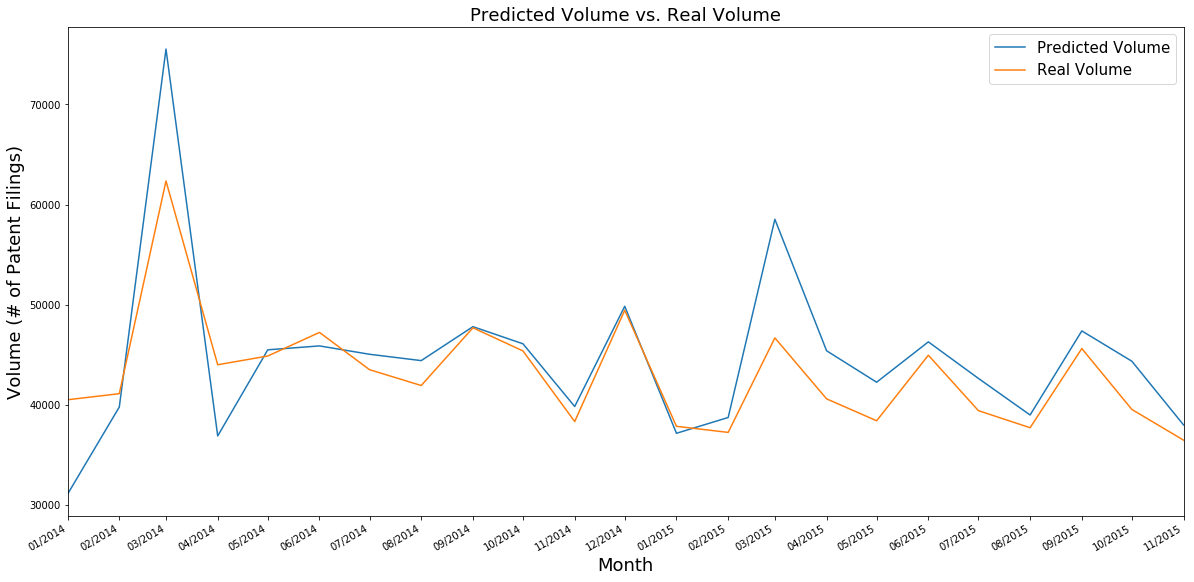

In [13]:
x = [dt.datetime.strptime(d,'%m/%d/%Y').date() for d in X_test['month']]
fig = plt.figure(figsize=(20,10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
line1, = plt.plot(x,X_test['volPred'])
line2, = plt.plot(x,X_test['volume'])
plt.title('Predicted Volume vs. Real Volume', fontsize=18)
plt.xlabel('Month', fontsize=18)
plt.ylabel('Volume (# of Patent Filings)', fontsize=18)
plt.legend((line1, line2), ('Predicted Volume', 'Real Volume'), prop={'size': 15})
plt.xlim(dt.datetime.strptime('01/01/2014', '%m/%d/%Y').date(), dt.datetime.strptime('11/01/2015', '%m/%d/%Y').date())
plt.gcf().autofmt_xdate()
fig.savefig('predicted_vs_real_volume.jpg')